# Introduction

## Dataset

[Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

This Online Retail data set contains all the transactions occurring for a UK-based and registered, non-store online retail between `01-Dec-2010` and `09-Dec-2011`.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Attribute Information:

- `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- `Description`: Product (item) name. Nominal.
- `Quantity`: The quantities of each product (item) per transaction. Numeric.
- `InvoiceDate`: Invoice date and time. Numeric. The day and time when a transaction was generated.
- `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (£).
- `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- `Country`: Country name. Nominal. The name of the country where a customer resides.

## RFM

**RFM** is commonly used to identify customers who are likely to buy more frequently, spend more, and/or are more likely to return to the company.

RFM stands for the three dimensions:
- `Recency` – How recently did the customer purchase?
- `Frequency` – How often do they purchase?
- `Monetary` – How much do they spend?

# Setup

In [2]:
# !pip install --upgrade plotly
# !pip install plotly-express

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 11.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.8.0
    Uninstalling plotly-5.8.0:
      Successfully uninstalled plotly-5.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wily 1.20.0 requires plotly<5.0.0,>=4.0.0, but you have plotly 5.8.2 which is incompatible.
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
poetry 1.1.13 requires packaging<21.0,>=20.4, but you have packaging 21.3 which is incompatible.
da

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# visualisation
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# to make subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# better matplotlib plots
%matplotlib inline
%config InlineBackend.figure_format="svg"

# Load data

In [4]:
data = pd.read_csv("../../data/OnlineRetail.csv", encoding="ISO-8859-1")
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 541909 rows and 8 columns.


In [5]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
110483,545688,21174,POTTERING IN THE SHED METAL SIGN,3,3/6/2011 12:42,2.08,16033.0,United Kingdom
72826,542268,22821,GIFT BAG PSYCHEDELIC APPLES,12,1/27/2011 8:30,0.65,15358.0,United Kingdom
524209,580538,23126,FELTCRAFT GIRL AMELIE KIT,8,12/5/2011 8:38,4.95,14075.0,United Kingdom
315604,564733,22475,SKULL DESIGN TV DINNER TRAY,2,8/28/2011 13:18,4.95,17841.0,United Kingdom
32887,539196,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,4,12/16/2010 12:09,4.25,18055.0,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


# EDA

Most of the customers in the dataset are from the UK

In [9]:
uk_percentage = data[data.Country == "United Kingdom"]["CustomerID"].nunique()/data["CustomerID"].nunique()
print(f"UK customers account for {uk_percentage*100:.2f}% of all customers")

UK customers account for 90.35% of all customers


In [10]:
df = data.groupby(["Country"])["CustomerID"].nunique().reset_index().sort_values(by=["CustomerID"], ascending=False)
fig = px.bar(
    df, x="Country", y="CustomerID", 
    height=600, width=600
)
fig.show()

In [11]:
cancelled_txn_percentage = 1 - (data[~data["InvoiceNo"].str.lower().str.contains("c")].shape[0]/data.shape[0])
print(f"{cancelled_txn_percentage*100:,.2f}% of transactions are cancelled transactions.")

1.71% of transactions are cancelled transactions.


# Data Preprocessing

Take 5 sample `InvoiceDate` from the dataset

In [12]:
data["InvoiceDate"].sample(5)

294414      8/8/2011 15:17
535254     12/7/2011 17:05
185177     5/11/2011 11:47
413900    10/24/2011 10:13
192547     5/17/2011 10:28
Name: InvoiceDate, dtype: object

We want to ensure that `InvoiceDate` is correctly of type `date`.

In addition, `CustomerID` should be of type `int`. Missing values will be ignored and kept as is. We'll handle them later.

In [13]:
data = data.assign(
    CustomerID=data["CustomerID"].astype(int, errors="ignore"),
    InvoiceDate=pd.to_datetime(data["InvoiceDate"], format="%m/%d/%Y %H:%M"),
)

InvoiceNo starting with 'c' indicates a cancellation. Thus, we want to remove these records from the dataset

In [14]:
print(f"Before: {data.shape[0]} rows and {data.shape[1]} columns.")
data = data[~data["InvoiceNo"].str.lower().str.contains("c")]
print(f"After : {data.shape[0]} rows and {data.shape[1]} columns.")

Before: 541909 rows and 8 columns.
After : 532621 rows and 8 columns.


There are many ways to deal with missing values in a data science project. We'll choose the simplest method here by dropping the records with missing values.

In [15]:
print(f"Before: {data.shape[0]} rows and {data.shape[1]} columns.")
data = data[~data["CustomerID"].isna()]
print(f"After : {data.shape[0]} rows and {data.shape[1]} columns.")

Before: 532621 rows and 8 columns.
After : 397924 rows and 8 columns.


By removing cancelled transactions and missing `CustomerID`, there are no longer any transactions with negative `Quantity`.

In [16]:
data[data["Quantity"] < 0].shape

(0, 8)

Verify that there are no longer any missing values in the dataset

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


# RFM Analysis

## Recency

**Recency**: How recently did the customer purchase?

In order to answer this question, we need to have an anchor date. We'll take the last `InvoiceDate` as the anchor date.

In [18]:
LAST_INVOICE_DATE = data["InvoiceDate"].max()
print(f"Anchor date: {LAST_INVOICE_DATE}")

Anchor date: 2011-12-09 12:50:00


**Recency** will be calculated as the number of days between the **anchor date** and the last `InvoiceDate` of each customer.
- Firstly, we need to find the last `InvoiceDate` of each customer.
- Secondly, we'll calculate the time difference between the **anchor date** and the last `InvoiceDate` of each customer. 

In [19]:
# find the last InvoiceDate for each customer
recency_data = data.groupby(["CustomerID"])["InvoiceDate"].agg(["min", "max"])
recency_data.rename(columns={"min": "FirstOrderDate", "max": "LastOrderDate"}, inplace=True)

# calculate the time difference between the anchor and the last InvoiceDate of each customer
recency_data["Recency"] = LAST_INVOICE_DATE - recency_data["LastOrderDate"]
recency_data["Recency"] = recency_data["Recency"].dt.days
recency_data.drop(columns=["FirstOrderDate", "LastOrderDate"], inplace=True)

In [20]:
# have a look at the recency we just calculated
recency_data.head()

,Recency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309


In [21]:
print(f"Recency data contains {recency_data.shape[0]} customers (rows)")

Recency data contains 4339 customers (rows)


Let's take a look at the `recency` distribution

In [22]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribution", "Boxplot"),
    x_title="Number of days between the last transaction and the anchor date",
    y_title="Customer Count",
)

fig.add_trace(
    go.Histogram(x=recency_data["Recency"],),
    row=1, col=1,
)

fig.add_trace(
    go.Box(x=recency_data["Recency"],),
    row=1, col=2,
)


fig.update_layout(height=500, width=1000, showlegend=False, title_text="Recency")

## Frequency

**Frequency** will be calculated as the number of times the customer purchased the product.

Thus, it will be the count of unique `InvoiceNo` per `CustomerID`.

In [23]:
frequency_data = data.groupby(["CustomerID"])["InvoiceNo"].agg(["nunique"])
frequency_data.rename(columns={"nunique": "Frequency"}, inplace=True)

In [24]:
# have a look at the frequency we just calculated
frequency_data.head()

,Frequency
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [25]:
print(f"Frequency data contains {frequency_data.shape[0]} customers (rows)")

Frequency data contains 4339 customers (rows)


In [26]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribution", "Boxplot"),
    x_title="Number of purchases",
    y_title="Customer Count",
)

fig.add_trace(
    go.Histogram(x=frequency_data["Frequency"],),
    row=1, col=1,
)

fig.add_trace(
    go.Box(x=frequency_data["Frequency"],),
    row=1, col=2,
)


fig.update_layout(height=500, width=1000, showlegend=False, title_text="Frequency")

## Monetary

**Monetary** is will be the total amount of money the customer spent. 

In [27]:
# calculate monetary value of each purchase
data["Amount"] = data["UnitPrice"] * data["Quantity"]

# find the total amount spent for each customer
monetary_data = data.groupby(["CustomerID"])["Amount"].agg(["sum"])

monetary_data.rename(columns={"sum": "Monetary"}, inplace=True)

In [28]:
# Let's take a look at the monetary data we just calculated
monetary_data.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [29]:
print(f"Monetary data contains {monetary_data.shape[0]} customers (rows)")

Monetary data contains 4339 customers (rows)


In [30]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribution", "Boxplot"),
    x_title="Total amount spent (£)",
    y_title="Customer Count",
)

fig.add_trace(
    go.Histogram(x=monetary_data["Monetary"],),
    row=1, col=1,
)

fig.add_trace(
    go.Box(x=monetary_data["Monetary"],),
    row=1, col=2,
)


fig.update_layout(height=500, width=1000, showlegend=False, title_text="Monetary")

## Combine RFM

Combine **Recency**, **Frequency** and **Monetary** into 1 single dataframe.

In [31]:
rfm_data = pd.concat([recency_data, frequency_data, monetary_data], axis=1)
rfm_data.reset_index(inplace=True)

In [32]:
# Let's take a look at the combined RFM data
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [33]:
print(f"RFM data contains {rfm_data.shape[0]} customers (rows)")

RFM data contains 4339 customers (rows)


**Recency**, **Frequency** and **Monetary** all appear to contain a lot of outliers. 

Therefore, we'll handle the outliers by capping the values of **Recency**, **Frequency** and **Monetary** at the `10th` and `90th` percentile values respectively.

In [34]:
# treating outliers
FLOORING = 0.1
CAPPING = 0.9

for key in ["Recency", "Frequency", "Monetary"]:
    flooring = rfm_data[key].quantile(FLOORING)
    capping = rfm_data[key].quantile(CAPPING)

    rfm_data[key + "_Original"] = rfm_data[key].copy()
    rfm_data[key] = np.select(
        condlist=[rfm_data[key] <= flooring, rfm_data[key] >= capping],
        choicelist=[flooring, capping],
        default=rfm_data[key]
    )

In [35]:
# Let's take a look at the combined RFM data without outliers
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Original,Frequency_Original,Monetary_Original
0,12346.0,262.0,1.0,3646.164,325,1,77183.60
1,12347.0,4.0,7.0,3646.164,1,7,4310.00
2,12348.0,74.0,4.0,1797.240,74,4,1797.24
3,12349.0,18.0,1.0,1757.550,18,1,1757.55
4,12350.0,262.0,1.0,334.400,309,1,334.40


In [36]:
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "Original: Recency", "Fixed: Recency", 
        "Original: Frequency", "Fixed: Frequency", 
        "Original: Monetary", "Fixed: Monetary"
    ),
    x_title="Customer Count",
)

for r, key in enumerate(["Recency", "Frequency", "Monetary"]):
    fig.add_trace(
        go.Box(x=rfm_data[f"{key}_Original"],),
        row=(r+1), col=1,
    )

    fig.add_trace(
        go.Box(x=rfm_data[f"{key}"],),
        row=(r+1), col=2,
    )

    fig.update_layout(height=700, width=1000, showlegend=False)

fig.show()

Another way to visualise the same thing using `seaborn`

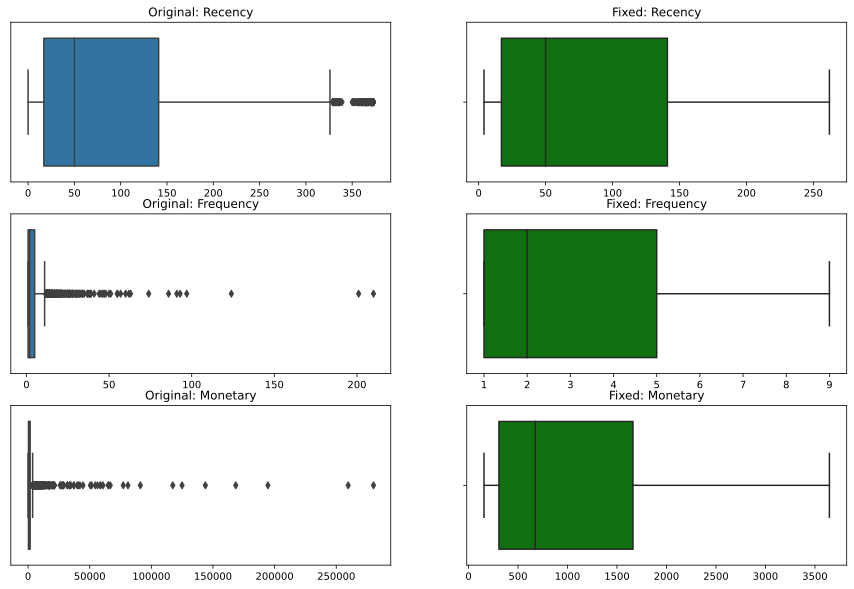

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)

for r, key in enumerate(["Recency", "Frequency", "Monetary"]):
    y_axis = axes[r, 0].axes.get_yaxis()
    y_axis.set_visible(False)

    axes[r, 0].set_title(f"Original: {key}")
    sns.boxplot(ax=axes[r, 0], data=rfm_data[f"{key}_Original"], orient="h")

    axes[r, 1].set_title(f"Fixed: {key}")
    sns.boxplot(ax=axes[r, 1], data=rfm_data[key], orient="h", color="green")

# RFM Score

RFM scores are defined such that score of `5` and `1` are the `best` and the `worst` respectively.

In [38]:
# most recent purchase should receive the highest score
rfm_data["RScore"] = pd.qcut(rfm_data["Recency"], 5, labels=range(5, 0, -1))

# the more purchases a customer has made, the higher the score
# Some customers will have the same number of purchases, so we'll rank the frequency score based on the first appearance
rfm_data["FScore"] = pd.qcut(rfm_data["Frequency"].rank(method="first"), 5, labels=range(1, 6, 1))

# the more money a customer has spent, the higher the score
rfm_data["MScore"] = pd.qcut(rfm_data["Monetary"], 5, labels=range(1, 6, 1))

In [39]:
rfm_data["RFMScore"] = (
    rfm_data["RScore"].astype(str) 
    + rfm_data["FScore"].astype(str) 
    + rfm_data["MScore"].astype(str)
)

rfm_data["RFMTotal"] = (
    rfm_data["RScore"].astype(int) 
    + rfm_data["FScore"].astype(int) 
    + rfm_data["MScore"].astype(int)
)

In [40]:
# best customers
rfm_data[rfm_data["RFMScore"] == "555"].head()

,CustomerID,Recency,Frequency,Monetary,Recency_Original,Frequency_Original,Monetary_Original,RScore,FScore,MScore,RFMScore,RFMTotal
1,12347.0,4.0,7.0,3646.164,1,7,4310.00,5,5,5,555,15
15,12362.0,4.0,9.0,3646.164,2,10,5226.23,5,5,5,555,15
56,12417.0,4.0,9.0,3646.164,2,9,3649.10,5,5,5,555,15
71,12433.0,4.0,7.0,3646.164,0,7,13375.87,5,5,5,555,15
75,12437.0,4.0,9.0,3646.164,1,18,4951.41,5,5,5,555,15


In [41]:
# worst customers
rfm_data[rfm_data["RFMScore"] == "111"].head()

,CustomerID,Recency,Frequency,Monetary,Recency_Original,Frequency_Original,Monetary_Original,RScore,FScore,MScore,RFMScore,RFMTotal
6,12353.0,203.0,1.0,156.566,203,1,89.00,1,1,1,111,3
14,12361.0,262.0,1.0,189.900,286,1,189.90,1,1,1,111,3
43,12401.0,262.0,1.0,156.566,302,1,84.30,1,1,1,111,3
44,12402.0,262.0,1.0,225.600,322,1,225.60,1,1,1,111,3
77,12441.0,262.0,1.0,173.550,366,1,173.55,1,1,1,111,3


# Segmentation with RFM

Refer to [RFM Segmentation - Business Use](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation) for more information.

|No|Customer Segment|Activity|Actionable Tip|
|:-:|:-|:-|:-|
|1|Champion|Bought recently, order often and spend the most.|Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.|
|2|Loyal|Orders regularly. Responsive to promotions.|Upsell higher value products. Ask for reviews.|
|3|Potential Loyalist|Recent customers, and spent a good amount.|Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.|
|4|New Customers|Bought most recently.|Provide on-boarding support, give them early access, start building relationship.|
|5|Promising|Potential loyalist a few months ago. Spends frequently and a good amount. But the last purchase was several weeks ago.|Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.|
|6|Core|Standard customers with not too long-ago purchase.|Make limited time offers.|
|7|Needs attention|Core customers whose last purchase happened more than one month ago.|Make limited time offers. Offer personalised recommendations.|
|8|Cannot Lose Them|Made the largest orders, and often. But haven’t returned for a long time.|Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.|
|9|At Risk|Similar to “Can’t lose them but losing” but with smaller monetary and frequency value.|Provide helpful resources on the site. Send personalised emails.|
|10|Hibernating|Made their last purchase a long time ago but in the last 4 weeks either visited the site or opened an email.|Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.|
|11|Lost|Made last purchase long time ago and didn’t engage at all in the last 4 weeks.|Revive interest with reach out campaign. Ignore otherwise.|

In [42]:
segmentation_map = {
    r'555|554|544|545|454|455|445': 'Champions',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating',
    r'111|112|121|131|141|151': 'Lost',
}
rfm_data['RFMSegment'] = rfm_data["RFMScore"].replace(segmentation_map, regex=True)

In [43]:
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Original,Frequency_Original,Monetary_Original,RScore,FScore,MScore,RFMScore,RFMTotal,RFMSegment
0,12346.0,262.0,1.0,3646.164,325,1,77183.60,1,1,5,115,7,Cannot Lose Them
1,12347.0,4.0,7.0,3646.164,1,7,4310.00,5,5,5,555,15,Champions
2,12348.0,74.0,4.0,1797.240,74,4,1797.24,2,4,4,244,10,At Risk
3,12349.0,18.0,1.0,1757.550,18,1,1757.55,4,1,4,414,9,Promising
4,12350.0,262.0,1.0,334.400,309,1,334.40,1,1,2,112,4,Lost


In [44]:
rfm_data.groupby(["RFMSegment"])[
    "Recency",
    "Frequency",
    "Monetary"
].agg(["median", "mean", "count"]).reset_index()

RFMSegment Recency                   Frequency                  \
                        median        mean count    median      mean count   
0       About To Sleep    70.0   86.530466   279       1.0  1.279570   279   
1              At Risk   122.0  141.326877   413       3.0  3.644068   413   
2     Cannot Lose Them   238.0  214.739130    92       1.0  2.054348    92   
3            Champions     8.0   11.278571   840       8.0  7.401190   840   
4          Hibernating   128.0  141.489796   686       1.0  1.553936   686   
5                 Lost   262.0  244.184426   488       1.0  1.065574   488   
6                Loyal    37.0   36.112150   428       4.5  4.983645   428   
7       Need Attention    30.0   33.123675   283       3.0  3.098940   283   
8        New Customers    24.0   27.724265   272       1.0  1.069853   272   
9   Potential Loyalist    22.0   26.414692   422       2.0  2.521327   422   
10           Promising    16.0   24.551471   136       1.0  1.323529   136   

    Monetary                     
      median         mean count  
0    210.350   290.584781   279  
1   1169.940  1462.443673   413  
2   1074.910  1342.882761    92  
3   2984.625  2772.753052   840  
4    374.850   414.796717   686  
5    178.955   221.241754   488  
6   1611.025  1881.199570   428  
7    942.260  1054.008512   283  
8    199.640   238.059029   272  
9    553.400   543.289024   422  
10   664.460   873.320309   136

# Visualisation

The curve of Recency, Frequency, and Monetary need to be in the same direction since we assign 1 and 5 for the worst and the best customer respectively.

Let's verify this by plotting the distribution.

In [45]:
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "Recency: Distribution", "Recency: Boxplot", 
        "Frequency: Distribution", "Frequency: Boxplot", 
        "Monetary: Distribution", "Monetary: Boxplot"
    ),
    x_title="Customer Count",
)

for r, key in enumerate(["Recency", "Frequency", "Monetary"]):
    fig.add_trace(
        go.Histogram(x=rfm_data[f"{key}"],),
        row=(r+1), col=1,
    )

    fig.add_trace(
        go.Box(x=rfm_data[f"{key}"],),
        row=(r+1), col=2,
    )

    fig.update_layout(height=700, width=1000, showlegend=False)

fig.show()

Another way to visualise the same thing using `seaborn`

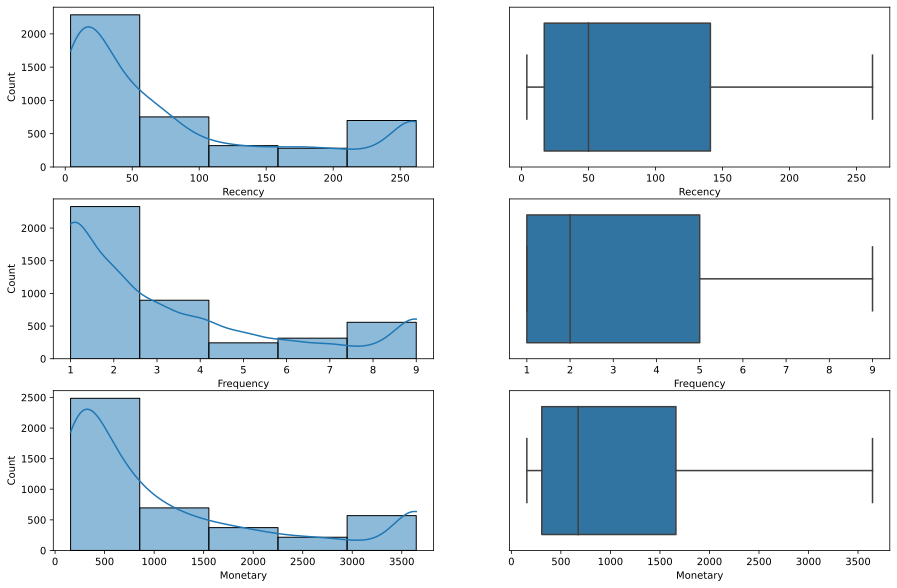

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

for r, key in enumerate(["Recency", "Frequency", "Monetary"]):
    sns.histplot(ax=axes[r, 0], data=rfm_data[key], bins=5, kde=True, legend=False)

    y_axis_ax1 = axes[r, 1].axes.get_yaxis()
    y_axis_ax1.set_visible(False)
    axes[r, 1].set_xlabel(f"{key}")
    sns.boxplot(ax=axes[r, 1], data=rfm_data[key], orient="h")

Let's see if Recency, Frequency and Monetary are correlated to each other.

In [50]:
fig = px.imshow(rfm_data[["Recency", "Frequency", "Monetary"]].corr(), text_auto=True)
fig.show()

Let's draw a treemap of the customers based on the RFM Segment

In [47]:
df = rfm_data["RFMSegment"].value_counts().reset_index()
df.columns = ["RFMSegment", "Count"]
fig = px.treemap(df, path=["RFMSegment"], values="Count", width=800, height=400)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Plot the distribution of **Monetary** for each combination of **Recency** and **Frequency** score. 

Ideally, we are expecting to see a diagonal line having the green bar increasing from 1 to 5 for **Monetary**.

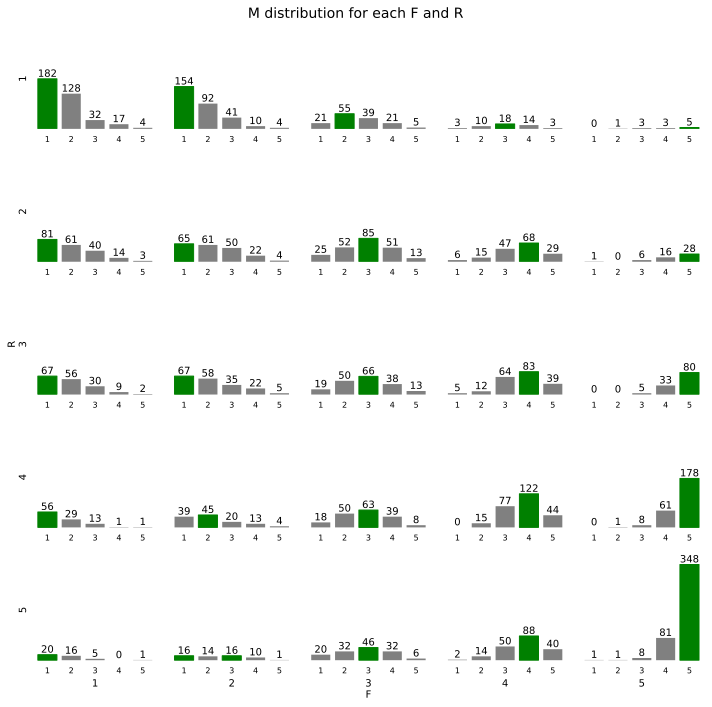

In [48]:
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

for r in range(1, 6):
    for f in range(1, 6):
        y = rfm_data[(rfm_data["RScore"] == r) & (rfm_data["FScore"] == f)]["MScore"].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color="grey")
        if r == 5:
            if f == 3:
                ax.set_xlabel(f"{f}\nF", va='top')
            else:
                ax.set_xlabel(f"{f}\n", va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel(f"R\n{r}")
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color("green")
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha="center",
                    va="bottom",
                    color="k")
fig.suptitle("M distribution for each F and R", fontsize=14)
plt.tight_layout()
plt.show()